## 2 Khám phá dữ liệu

Xóa các dòng link bị trùng trong file job_links.txt

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import numpy as np
from sklearn.linear_model import LinearRegression

### Lấy thêm các link mới cập nhật trên trang careerviet

In [2]:
'''
# Đọc link từ file job_links2.txt, nếu khác các link trong job_links.txt thì thêm vào job_links3.txt
with open('../CollectingData/job_links2.txt', 'r') as f:
    job_links2 = f.read().splitlines()
with open('../CollectingData/job_links.txt', 'r') as f:
    job_links = f.read().splitlines()
with open('../CollectingData/job_links3.txt', 'r') as f:
    job_links3 = f.read().splitlines()
for link in job_links2:
    if link not in job_links:
        job_links3.append(link)
with open('../CollectingData/job_links3.txt', 'w') as f:
    for link in job_links3:
        f.write(link + '\n')
'''

"\n# Đọc link từ file job_links2.txt, nếu khác các link trong job_links.txt thì thêm vào job_links3.txt\nwith open('../CollectingData/job_links2.txt', 'r') as f:\n    job_links2 = f.read().splitlines()\nwith open('../CollectingData/job_links.txt', 'r') as f:\n    job_links = f.read().splitlines()\nwith open('../CollectingData/job_links3.txt', 'r') as f:\n    job_links3 = f.read().splitlines()\nfor link in job_links2:\n    if link not in job_links:\n        job_links3.append(link)\nwith open('../CollectingData/job_links3.txt', 'w') as f:\n    for link in job_links3:\n        f.write(link + '\n')\n"

In [3]:

# Đếm số dòng trong file job_links.txt
with open('../dataset/job_links.txt', 'r') as f:
    job_links = f.readlines()
print(len(job_links))

# Đọc file job_links.txt và xóa các dòng link bị trùng lặp
with open('../dataset/job_links.txt', 'r') as f:
    job_links = f.readlines()
job_links = list(set(job_links))

# Ghi lại vào file job_links.txt
with open('../dataset/job_links.txt', 'w') as f:
    for job_link in job_links:
        f.write(job_link)

print(len(job_links))

29392
29392


Có tất cả x dòng và y cột.

Mỗi dòng đại diện cho 1 mẫu dữ liệu.
| Cột               | Mô tả                                                         | Vấn đề                              |
|-------------------|---------------------------------------------------------------|-------------------------------------|
| Job Name          | Tên công việc                                                 |                                     |
| Job Link          | Đường dẫn của job                                             |Xóa lặp dựa trên Link của job        |
| Location          | Địa điểm                                                      |                                     |
| Update Date       | Ngày up CV                                                    |Chuyển về Datetime                   |
| Deadline          | Hạn nộp CV                                                    |Chuyển về Datetime                   |
| Experience        | Kinh nghiệm                                                   |Chỉ lấy phần số bên trái (min)       |
| Job Level         | Cấp bậc                                                       |Loại bỏ dữ liệu trống (Not specific) |
| Industry          | Loại ngành nghề                                               |Đã xử lí                             |
| Employment Type   | Hình thức làm việc                                            |Chia thành n cột                     |
| Welfare           | Phúc lợi                                                      |Chia thành m cột                     |
| Job Description   | Mô tả công việc                                               |Gộp                                  |
| Job Requirement   | Yêu cầu công việc                                             |Gộp                                  |
| Other Information | Thông tin khác                                                |Gộp                                  |
| Job Tags          | Job Tags                                                      |                                     |
| Company URL       | Đường dẫn đến trang công ty                                   |                                     |
| Company Name      | Tên công ty                                                   |                                     |
| Company Address   | Địa điểm của công ty                                          |                                     |
| Company Scale     | Quy mô của công ty                                            |Chia thành 2 cột (min và max)        |
| Company Type      | Loại hình hoạt động                                           |Xóa các dòng bị lỗi dấu              |
| Company Website   | Website của công ty                                           |                                     |
| Followers         | Số lượng người theo dõi                                       |Chuyển về dạng số nguyên             |
| Company Intro     | Phần giới thiệu của công ty                                   |                                     |
| Salary            | Lương                                                         |Đã xử lí                             |

In [4]:
# Đọc file csv
data = pd.read_csv('../dataset/job_data_new.csv')
data.head()

,Job Name,Job Link,Location,Update Date,Deadline,Experience,Job Level,Industry,Employment Type,Welfare,...,Job Tags,Company URL,Salary,Company Name,Company Address,Company Scale,Company Type,Company Website,Follower,Company Introduction
0,Sales Manager,https://careerviet.vn/vi/tim-viec-lam/sales-ma...,Hồ Chí Minh,25/10/2024,23/11/2024,3 - 5 \n ...,Quản lý,\n ...,Nhân viên chính thức,"Chế độ bảo hiểm, Phụ cấp, Đồng phục, Chế độ th...",...,"Giám đốc kinh doanh, Sales Director, Giám đốc ...",Not Found,Cạnh tranh,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[GẤP] Nhân viên Sales Tiếng Trung / Chinese Sa...,https://careerviet.vn/vi/tim-viec-lam/gap-nhan...,Hồ Chí Minh,23/11/2024,17/12/2024,Not specified,Nhân viên,\n ...,Nhân viên chính thức,"Chế độ bảo hiểm, Phụ cấp, Xe đưa đón, Đồng phụ...",...,"sales tiếng trung, chinese sales staff, chines...",Not Found,Cạnh tranh,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Not specified,https://careerviet.vn/vi/tim-viec-lam/nhan-vie...,Not specified,Not specified,Not specified,Not specified,Not specified,Not Found,Not specified,"Chế độ bảo hiểm, Phụ cấp, Xe đưa đón, Đào tạo,...",...,"kỹ sư bảo trì, chuyên viên bảo trì, maintenanc...",Not Found,Not specified,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Warehouse Supervisor,https://careerviet.vn/vi/tim-viec-lam/warehous...,Bình Định,25/10/2024,23/11/2024,2 - 5 \n ...,Trưởng nhóm / Giám sát,\n ...,Nhân viên chính thức,"Laptop, Chế độ bảo hiểm, Du Lịch, Phụ cấp, Xe ...",...,Giám sát kho,https://careerviet.vn/vi/nha-tuyen-dung/cong-t...,Cạnh tranh,CÔNG TY TNHH WGR INDUSTRIES,"Lô A8, KCN Becamex Bình Định, Khu kinh tế Nhơn...",Not specified,Trách nhiệm hữu hạn,Not specified,169,"WGR Industries Co., Ltd(FACTORY MANUFACTURING ..."
4,Nhân viên Môi giới,https://careerviet.vn/vi/tim-viec-lam/nhan-vie...,Hà Nội,25/10/2024,23/11/2024,Trên 1 \n ...,Nhân viên,\n ...,Nhân viên chính thức,"Chế độ bảo hiểm, Du Lịch, Chế độ thưởng, Chăm ...",...,"Giao dịch viên, Teller, Chuyên viên đối ngoại,...",https://careerviet.vn/vi/nha-tuyen-dung/cong-t...,Cạnh tranh,Công ty Cổ phần Chứng khoán Dầu khí (PSI),"Số 18 Lý Thường Kiệt, Quận Hoàn Kiếm, Hà Nội",100-499,Cổ phần,https://www.psi.vn/vi,2.27,PSI là Công ty chứng khoán thuộc Tập đoàn Dầu ...


### Loại bỏ các dòng có job name là not specified

In [5]:
print(data.shape[0])

# Bỏ các dòng có Job Name là Not specified
data = data[data['Job Name'] != 'Not specified']

print(data.shape[0])

26361
25636


### Dữ liệu bị trùng 1 số dòng

In [6]:
data = data.drop_duplicates()
data = data.drop_duplicates(subset=['Job Description','Job Level','Company Name','Location'], keep='first') # Some company create the same after few day and change a bit 
data.shape

(20020, 23)

### Kiểm tra dữ liệu có null hay không

<Axes: >

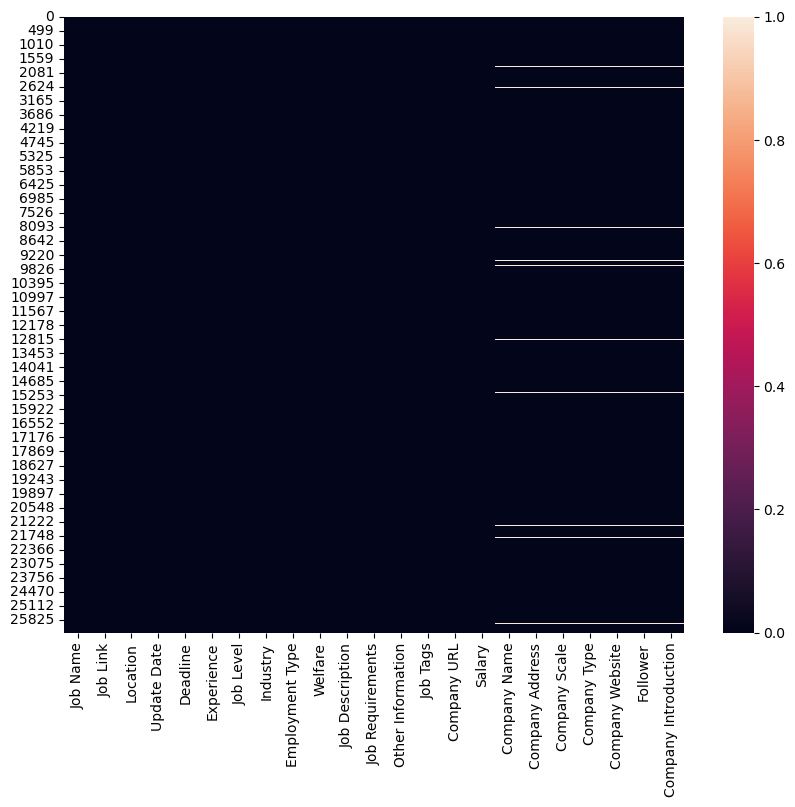

In [7]:
plt.subplots(figsize=(10,8))
sns.heatmap(data.isnull())

In [8]:
# Xóa dòng có giá trị null
data = data.dropna()

19749


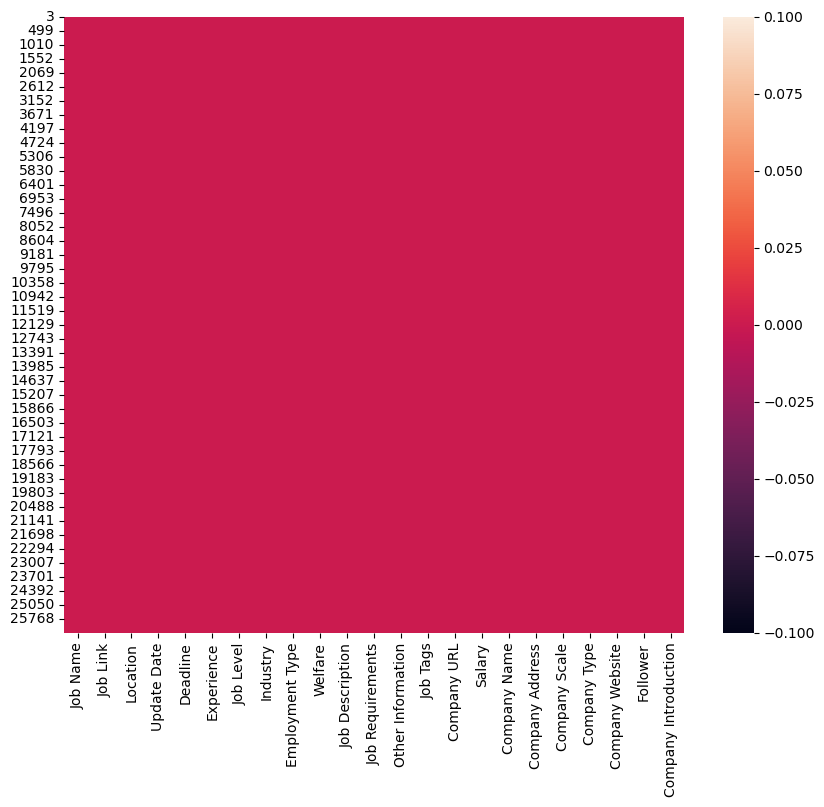

In [9]:
plt.subplots(figsize=(10,8))
sns.heatmap(data.isnull())
print(data.shape[0])


| Cột               | Kiểu dữ liệu |
|-------------------|--------------|
| Location          | object       |
| Experience        | float64      |
| Job Level         | object       |
| Industry          | object       |
| Employment Type   | object       |
| Welfare           | object       |
| Job Requirements  | object       |
| Follower          | int64        |
| Salary            | int64        |

In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 19749 entries, 3 to 26359
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Job Name              19749 non-null  object
 1   Job Link              19749 non-null  object
 2   Location              19749 non-null  object
 3   Update Date           19749 non-null  object
 4   Deadline              19749 non-null  object
 5   Experience            19749 non-null  object
 6   Job Level             19749 non-null  object
 7   Industry              19749 non-null  object
 8   Employment Type       19749 non-null  object
 9   Welfare               19749 non-null  object
 10  Job Description       19749 non-null  object
 11  Job Requirements      19749 non-null  object
 12  Other Information     19749 non-null  object
 13  Job Tags              19749 non-null  object
 14  Company URL           19749 non-null  object
 15  Salary                19749 non-null  obj

In [11]:
# Xác định kiểu dữ liệu của các cột
data.dtypes

Job Name                object
Job Link                object
Location                object
Update Date             object
Deadline                object
Experience              object
Job Level               object
Industry                object
Employment Type         object
Welfare                 object
Job Description         object
Job Requirements        object
Other Information       object
Job Tags                object
Company URL             object
Salary                  object
Company Name            object
Company Address         object
Company Scale           object
Company Type            object
Company Website         object
Follower                object
Company Introduction    object
dtype: object

### Chuyển 2 cột Update Date và Deadline về dạng Datetime và tách thành các cột ngày, tháng, năm

In [12]:
# Bỏ các dòng mà cột Update Date hoặc Deadline có giá trị là Not specified
data = data[(data['Update Date'] != 'Not specified') & (data['Deadline'] != 'Not specified')]
data.shape

# Chuyển 2 cột Update Date và Deadline về dạng Datetime và tách thành các cột ngày, tháng, năm
data['Update Date'] = pd.to_datetime(data['Update Date'], dayfirst=True, errors='coerce')
data['Deadline'] = pd.to_datetime(data['Deadline'], dayfirst=True, errors='coerce')

data['Update Date_day'] = data['Update Date'].dt.day
data['Update Date_month'] = data['Update Date'].dt.month
data['Update Date_year'] = data['Update Date'].dt.year

data['Deadline_day'] = data['Deadline'].dt.day
data['Deadline_month'] = data['Deadline'].dt.month
data['Deadline_year'] = data['Deadline'].dt.year
data.head()

,Job Name,Job Link,Location,Update Date,Deadline,Experience,Job Level,Industry,Employment Type,Welfare,...,Company Type,Company Website,Follower,Company Introduction,Update Date_day,Update Date_month,Update Date_year,Deadline_day,Deadline_month,Deadline_year
3,Warehouse Supervisor,https://careerviet.vn/vi/tim-viec-lam/warehous...,Bình Định,2024-10-25,2024-11-23,2 - 5 \n ...,Trưởng nhóm / Giám sát,\n ...,Nhân viên chính thức,"Laptop, Chế độ bảo hiểm, Du Lịch, Phụ cấp, Xe ...",...,Trách nhiệm hữu hạn,Not specified,169,"WGR Industries Co., Ltd(FACTORY MANUFACTURING ...",25,10,2024,23,11,2024
4,Nhân viên Môi giới,https://careerviet.vn/vi/tim-viec-lam/nhan-vie...,Hà Nội,2024-10-25,2024-11-23,Trên 1 \n ...,Nhân viên,\n ...,Nhân viên chính thức,"Chế độ bảo hiểm, Du Lịch, Chế độ thưởng, Chăm ...",...,Cổ phần,https://www.psi.vn/vi,2.27,PSI là Công ty chứng khoán thuộc Tập đoàn Dầu ...,25,10,2024,23,11,2024
6,Nhân Viên Thống Kê,https://careerviet.vn/vi/tim-viec-lam/nhan-vie...,Hải Dương,2024-10-25,2024-11-23,Not specified,Nhân viên,\n ...,Nhân viên chính thức,"Laptop, Chế độ bảo hiểm, Du Lịch, Phụ cấp, Du ...",...,Cổ phần,http://anphatholdings.com/,376,AN PHÁT HOLDINGS- “Không ngừng sáng tạo – Vững...,25,10,2024,23,11,2024
7,Giám đốc Quan hệ khách hàng Tín dụng - RB - MS...,https://careerviet.vn/vi/tim-viec-lam/giam-doc...,An Giang,2024-10-25,2024-11-23,5 - 7 \n ...,Quản lý,\n ...,Nhân viên chính thức,"Chế độ bảo hiểm, Du Lịch, Chế độ thưởng, Chăm ...",...,Cổ phần,https://jobs.msb.com.vn/,9.389,VỀ NGÂN HÀNG TMCP HÀNG HẢI VIỆT NAM - MSBMSB l...,25,10,2024,23,11,2024
8,Nhân viên kỹ thuật tòa nhà (Chấp nhận SV mới r...,https://careerviet.vn/vi/tim-viec-lam/nhan-vie...,Hà Nội,2024-11-24,2024-12-23,Chưa có kinh nghiệm,Nhân viên,\n ...,Nhân viên chính thức,"Chế độ bảo hiểm, Du Lịch, Phụ cấp, Du lịch nướ...",...,Cổ phần,http://wto.com.vn,3.131,Tổng Công ty Cổ phần Thương mại Xây dựng tiền ...,24,11,2024,23,12,2024


### Đưa các cột cần thiết về  kiểu category

### Loại bỏ các cột không cần thiết (không có giá trị trực quan)